In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('spotifytoptracks.csv', index_col=0)

del df['track_id']

df.head()

,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   energy            50 non-null     float64
 4   danceability      50 non-null     float64
 5   key               50 non-null     int64  
 6   loudness          50 non-null     float64
 7   acousticness      50 non-null     float64
 8   speechiness       50 non-null     float64
 9   instrumentalness  50 non-null     float64
 10  liveness          50 non-null     float64
 11  valence           50 non-null     float64
 12  tempo             50 non-null     float64
 13  duration_ms       50 non-null     int64  
 14  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(4)
memory usage: 6.2+ KB


In [7]:
df.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


In [8]:
print(f"There are {df.duplicated().sum()} duplicates in the dataset.")

There are 0 duplicates in the dataset.


In [9]:
def remove_outliers(df, threshold=3):
    # Identify numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Calculate z-scores for the specified columns
    z_scores = stats.zscore(df[numeric_cols])
    
    # Identify outliers
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    
    # Iterate over each column to find outliers
    for col in numeric_cols:
        outlier_indices = df.index[outliers[col]]
        for index in outlier_indices:
            print(f"Outlier detected in row {index}, column '{col}': value = {df.loc[index, col]}")
    
    # Create a mask for rows where all z-scores are within the threshold
    mask = (~outliers).all(axis=1)
    
    # Filter the DataFrame based on the mask
    df_filtered = df[mask]
    
    return df_filtered

df_cleaned = remove_outliers(df)

Outlier detected in row 24, column 'loudness': value = -14.454
Outlier detected in row 19, column 'speechiness': value = 0.487
Outlier detected in row 24, column 'instrumentalness': value = 0.657
Outlier detected in row 2, column 'liveness': value = 0.79
Outlier detected in row 41, column 'liveness': value = 0.792
Outlier detected in row 49, column 'duration_ms': value = 312820


## Outlier Analysis Results

While analyzing the dataset, five columns with potential outliers were identified using the z-score method.
1. speechiness: This feature measures the presence of spoken words in a track. Values close to 1.0 indicate tracks that are heavily speech-oriented, while values close to 0.0 indicate music with little or no speech.
2. instrumentalness: This feature predicts whether a track contains no vocals. A value close to 1.0 indicates high confidence that the track is instrumental, while a value close to 0.0 suggests that the track is likely vocal.
3. liveness: This feature indicates the presence of an audience in the recording. Higher values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood of a live performance.
4. loudness: This feature measures the overall amplitude of a track in decibels (dB). Loudness is measured relative to the maximum possible loudness, with values typically ranging from -60 dB to 0 dB. A lower value represents a quieter track.
5. duration_ms: This feature represents the length of the track in milliseconds.
#### Reasons for Not Removing Outliers
1. Small Dataset Size: The dataset contains only 50 observations. Removing outliers from such a small sample could result in a loss of valuable information and potentially bias the analysis. In small datasets, outliers can have more impact on statistical measures, so preserving them might provide more comprehensive insights.
2. Reliable Data Source: The data comes from Spotify's API, a trusted and robust source. Given the reliable nature of this source, there is little reason to suspect that the outliers represent errors or inaccuracies. These outliers are likely accurate reflections of unique songs or characteristics.
3. Feature-Specific Considerations:
    - speechiness, instrumentalness, and liveness: These features are naturally bound between 0 and 1, and all observed values fall within this expected range. As such, any high or low values are not errors but rather reflect the inherent nature of the tracks.
    - loudness: The track with a loudness of -14 dB, although quieter than most, may represent a unique song that is meant to be more subdued. This value is not excessively extreme and fits within the typical range of loudness for music tracks.
    - duration_ms: The duration of 312,820 milliseconds (~5 minutes and 13 seconds) for a track may simply indicate a longer-than-average song. In the context of music, a track of this length is not uncommon.

## How many observations are there in this dataset?

In [10]:
print(f"There are {df.count().iloc[0]} unique observations in the dataset.")

There are 50 unique observations in the dataset.


## How many features this dataset has?

In [11]:
print(f"The dataset has {df.shape[1]} features.")

The dataset has 15 features.


## Which of the features are categorical?

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols_list = ", ".join(cat_cols)
print(f"The dataset has {len(cat_cols)} categorical features: {cat_cols_list}.")

The dataset has 4 categorical features: artist, album, track_name, genre.


## Which of the features are numeric?

In [13]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols_list = ", ".join(num_cols)
print(f"The dataset has {len(num_cols)} numeric features: {num_cols_list}.")

The dataset has 11 numeric features: energy, danceability, key, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms.


## Are there any artists that have more than 1 popular track? If yes, which and how many?

In [14]:
# Group by artist and filter artists with more than one track
popular_artists = df.groupby('artist').filter(lambda x: len(x) > 1)

# Group by artist again to count tracks and list their titles
grouped_artists = popular_artists.groupby('artist').agg(
    track_count=('track_name', 'count'),
    titles=('track_name', lambda x: ', '.join(x))
)

# Reset index to make 'artist' a column
grouped_artists.reset_index(inplace=True)
pd.set_option('display.max_colwidth', None)
grouped_artists

,artist,track_count,titles
0,Billie Eilish,3,"everything i wanted, bad guy, lovely (with Khalid)"
1,Dua Lipa,3,"Don't Start Now, Break My Heart, Physical"
2,Harry Styles,2,"Watermelon Sugar, Adore You"
3,Justin Bieber,2,"Intentions (feat. Quavo), Yummy"
4,Lewis Capaldi,2,"Someone You Loved, Before You Go"
5,Post Malone,2,"Circles, Sunflower - Spider-Man: Into the Spider-Verse"
6,Travis Scott,3,"HIGHEST IN THE ROOM, goosebumps, SICKO MODE"


## Who was the most popular artist?

In [15]:
most_streamed_artist = df.iloc[0,0]
most_streamed_track = df.iloc[0,2]
print(f"In terms of number of streams, it is {most_streamed_artist} with the track '{most_streamed_track}'.")

In terms of number of streams, it is The Weeknd with the track 'Blinding Lights'.


In [16]:
# Group by artist and count the number of songs for each artist
track_counts = df['artist'].value_counts()
max_count = track_counts.max()

# Identify the artists with the most tracks
most_tracks_artists = track_counts[track_counts == max_count]
artists_list = ", ".join([f"{artist} ({count})" for artist, count in most_tracks_artists.items()])

print(f"Alternatively, the artist(s) with the most tracks in Top 50: {artists_list}.")

Alternatively, the artist(s) with the most tracks in Top 50: Billie Eilish (3), Dua Lipa (3), Travis Scott (3).


## How many artists in total have their songs in the top 50?

In [17]:
print(f"The dataset has {df['artist'].nunique()} unique artists.")

The dataset has 40 unique artists.


## Are there any albums that have more than 1 popular track? If yes, which and how many?

In [18]:
# Group by album and filter albums with more than one track
popular_albums = df.groupby('album').filter(lambda x: len(x) > 1)

# Group by album again to count tracks and list their titles
grouped_albums = popular_albums.groupby('album').agg(
    track_count=('track_name', 'count'),
    titles=('track_name', lambda x: ', '.join(x))
)

# Reset index to make 'album' a column
grouped_albums.reset_index(inplace=True)
grouped_albums

,album,track_count,titles
0,Changes,2,"Intentions (feat. Quavo), Yummy"
1,Fine Line,2,"Watermelon Sugar, Adore You"
2,Future Nostalgia,3,"Don't Start Now, Break My Heart, Physical"
3,Hollywood's Bleeding,2,"Circles, Sunflower - Spider-Man: Into the Spider-Verse"


## How many albums in total have their songs in the top 50?

In [19]:
print(f"The dataset has {df['album'].nunique()} unique albums.")

The dataset has 45 unique albums.


## Which tracks have a danceability score above 0.7?

In [20]:
df[df['danceability'] > 0.7][['track_name', 'danceability']]

,track_name,danceability
1,Dance Monkey,0.825
2,The Box,0.896
3,Roses - Imanbek Remix,0.785
4,Don't Start Now,0.793
5,ROCKSTAR (feat. Roddy Ricch),0.746
7,death bed (coffee for your head),0.726
8,Falling,0.784
10,Tusa,0.803
13,Blueberry Faygo,0.774
14,Intentions (feat. Quavo),0.806


## Which tracks have a danceability score below 0.4?

In [21]:
df[df['danceability'] < 0.4][['track_name', 'danceability']]

,track_name,danceability
44,lovely (with Khalid),0.351


## Which tracks have their loudness above -5?

In [22]:
df[df['loudness'] > -5][['track_name', 'loudness']]

,track_name,loudness
4,Don't Start Now,-4.521
6,Watermelon Sugar,-4.209
10,Tusa,-3.280
12,Circles,-3.497
16,Before You Go,-4.858
17,Say So,-4.577
21,Adore You,-3.675
23,Mood (feat. iann dior),-3.558
31,Break My Heart,-3.434
32,Dynamite,-4.410


## Which tracks have their loudness below -8?

In [23]:
df[df['loudness'] < -8][['track_name', 'loudness']]

,track_name,loudness
7,death bed (coffee for your head),-8.765
8,Falling,-8.756
15,Toosie Slide,-8.820
20,Savage Love (Laxed - Siren Beat),-8.520
24,everything i wanted,-14.454
26,bad guy,-10.965
36,HIGHEST IN THE ROOM,-8.764
44,lovely (with Khalid),-10.109
47,If the World Was Ending - feat. Julia Michaels,-10.086


## Which track is the longest?

In [24]:
df[df['duration_ms'] == df['duration_ms'].max()][['track_name', 'duration_ms']]

,track_name,duration_ms
49,SICKO MODE,312820


## Which track is the shortest?

In [25]:
df[df['duration_ms'] == df['duration_ms'].min()][['track_name', 'duration_ms']]

,track_name,duration_ms
23,Mood (feat. iann dior),140526


## Which genre is the most popular?

In [26]:
# Group by genre and count the number of tracks for each genre
track_counts = df['genre'].value_counts()

# Identify the genre with the most tracks
most_tracks_genre = track_counts.idxmax()
num_tracks = track_counts.max()
print(f"The genre with the most tracks is {most_tracks_genre} with {num_tracks} tracks.")

The genre with the most tracks is Pop with 14 tracks.


## Which genres have just one song in the top 50?

In [27]:
# Group by genre and filter genres with just one track
df.groupby('genre').filter(lambda x: len(x) == 1)['genre']

4                               Nu-disco
8                R&B/Hip-Hop alternative
12                         Pop/Soft Rock
23                               Pop rap
27                          Hip-Hop/Trap
31                       Dance-pop/Disco
32                             Disco-pop
37                  Dreampop/Hip-Hop/R&B
43    Alternative/reggaeton/experimental
44                           Chamber pop
Name: genre, dtype: object

## How many genres in total are represented in the top 50?

In [28]:
print(f"The dataset has {df['genre'].nunique()} unique genres.")

The dataset has 16 unique genres.


## Which features are strongly positively / negatively correlated or not correlated at all?

**loundness/energy** - strongly positively correlated (reddish on the heatmap)

**acousticness/energy** - strongly negatevely correlated (dark blue on the heatmap)

All the light blue/red pairs on the heatmap point to values that are not correlated at all. For example, energy/speechiness, duration_ms/loudness, etc.

<Figure size 1000x800 with 0 Axes>

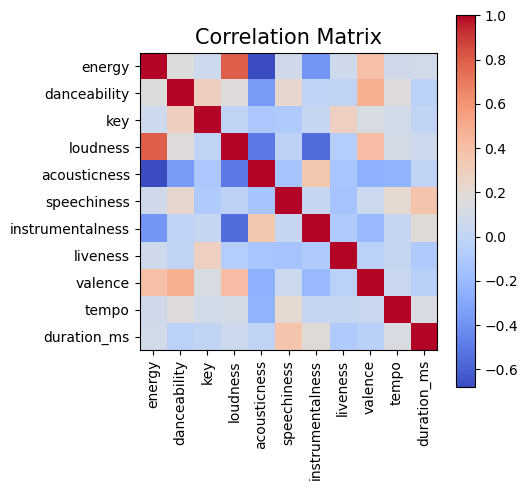

In [29]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(num=None, figsize=(10, 8))
plt.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar()
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()

In [30]:
def plot_avg_feature_by_genre(df, feature, genres_of_interest):
    # Filter the dataset to include only the specified genres
    filtered_df = df[df['genre'].isin(genres_of_interest)]

    # Calculate the average value of the specified feature for each genre
    avg_feature = filtered_df.groupby('genre')[feature].mean()

    # Plot the results
    plt.figure(figsize=(8, 4))
    avg_feature.plot(kind='bar', color=['#696969', '#30d5c8', '#ff9933', '#ff69b4'])
    plt.title(f'Average {feature.capitalize()} Score by Genre')
    plt.xlabel('Genre')
    plt.ylabel(feature.capitalize())
    plt.xticks(rotation=0)
    plt.show()

# Define the genres of interest
genres_of_interest = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

## How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

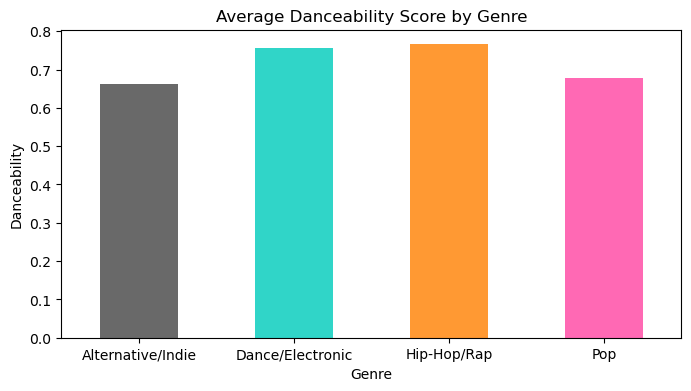

In [31]:
plot_avg_feature_by_genre(df, 'danceability', genres_of_interest)

#### Explanation of Danceability Feature
Danceability measures how suitable a track is for dancing, considering tempo, rhythm, beat strength, and regularity. The score ranges from 0 to 1, with 0 being the least danceable and 1 being the most danceable.
#### Insights from the Chart
1. Dance/Electronic and Hip-Hop/Rap have the highest danceability scores, both above 0.75, making them the most dance-friendly genres.
2. Pop music has a moderate danceability score of around 0.7, indicating it is generally suitable for dancing but varies more in rhythmic elements.
3. Alternative/Indie has the lowest score, around 0.65, suggesting that its complex rhythms make it less danceable compared to other genres.

## How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

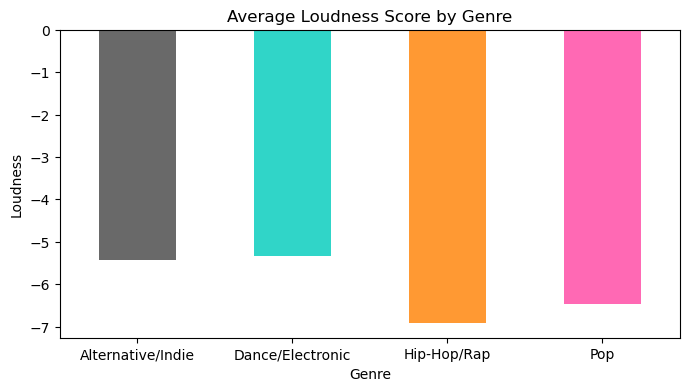

In [32]:
plot_avg_feature_by_genre(df, 'loudness', genres_of_interest)

#### Explanation of Loudness Feature
Loudness measures the overall volume of a track in decibels (dB). It is expressed as a negative value relative to 0 dB, the maximum possible loudness. A value closer to 0 indicates a louder track, while a more negative value indicates a quieter track.
#### Insights from the Chart
1. Alternative/Indie and Dance/Electronic are the loudest genres, with average loudness scores around -5.5 dB. This suggests these genres are typically produced to be more powerful and impactful, likely enhancing the listening experience with a fuller sound.
2. Pop is moderately loud, with an average loudness score of approximately -6.5 dB. This indicates a balanced production style, aiming for clarity and broad appeal while maintaining a certain dynamic range.
3. Hip-Hop/Rap is the quietest among the genres, with an average loudness score close to -7 dB. This could reflect production choices that emphasize beats and vocals over sheer loudness, potentially aiming for a more dynamic and nuanced sound.

## How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

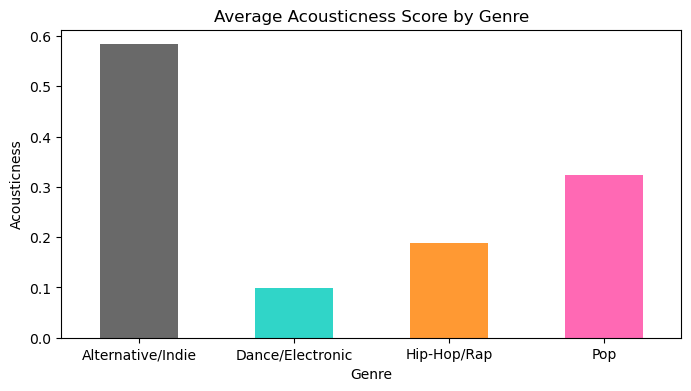

In [33]:
plot_avg_feature_by_genre(df, 'acousticness', genres_of_interest)

#### Explanation of Acousticness Feature
Acousticness measures how acoustic a track is, with values ranging from 0 to 1. A value of 1 represents a track that is highly acoustic, featuring more organic sounds like traditional instruments, whereas a value of 0 represents a track with no acoustic elements, likely dominated by electronic instruments.
#### Insights from the Chart
1. Alternative/Indie has the highest acousticness score, close to 0.6, indicating that this genre frequently incorporates acoustic elements, making it sound more natural and organic.
2. Pop has a moderate acousticness score of about 0.3, suggesting that while Pop tracks often use electronic production techniques, there is still a noticeable presence of acoustic elements.
3. Hip-Hop/Rap shows a lower acousticness score, around 0.2, indicating a preference for electronic and synthetic sounds over acoustic instrumentation.
4. Dance/Electronic has the lowest acousticness score, under 0.1, emphasizing its reliance on electronic production and synthetic sounds, which are characteristic of the genre.